In [1]:
import tensorflow as tf

In [2]:
class NaiveDense:
    """
    A fully connected layer.
    """

    def __init__(self, input_size, num_neurons, activation):
        self.activation = activation

        # randomly initialize weights in range [0, 0.1)
        self.W = tf.Variable(
            tf.random.uniform(
                shape=(input_size, num_neurons),
                minval=0,
                maxval=0.1
            )
        )

        # initialize biases to 0
        self.b = tf.Variable(
            tf.zeros(shape=(num_neurons,))
        )

    def __call__(self, inputs):
        """
        Transform the inputs of this layer with weighted sum and activation.
        """

        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        """
        Get weights and biases of this layer.
        """

        return [self.W, self.b]

In [3]:
class NaiveSequential:
    """
    A neural network with sequential model.
    """

    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        """
        A forward pass through the network.
        """

        x = inputs
        for layer in self.layers:
            x = layer(x)

        return x

    def compile(self, optimizer, loss):
        """
        Configure the network before training.
        """

        self.optimizer = optimizer
        self.loss = loss

    def fit(self, inputs, labels, epochs, batch_size=128):
        """
        Train the network.
        """

        for epoch in range(epochs):
            print(f"{epoch})")

            batch_generator = BatchGenerator(inputs, labels)
            for i in range(batch_generator.num_batches):
                inputs_batch, labels_batch = batch_generator.next()
                loss = self.one_training_step(inputs_batch, labels_batch)
                if i % 100 == 0:
                    print(f"  loss at batch {i}: {loss:.2f}")

    def one_training_step(self, inputs_batch, labels_batch):
        with tf.GradientTape() as tape:
            # record the operations performed on tensors within this scope

            # make a forwords pass
            predictions = self(inputs_batch)

            # compute average loss of this batch
            per_sample_losses = self.loss(labels_batch, predictions)
            average_loss = tf.reduce_mean(per_sample_losses)

        # compute gradients of loss wrt. network parameters with automatic differentiation
        gradients = tape.gradient(average_loss, self.weights)

        # update the parameters using gradients
        self.update_weights(gradients, self.weights)

        return average_loss

    def update_weights(self, gradients, weights):
        self.optimizer.apply_gradients(zip(gradients, weights))

    @property
    def weights(self):
        """
        Get weights and biases of the network.
        """

        weights = []
        for layer in self.layers:
            weights += layer.weights

        return weights

In [4]:
import math

class BatchGenerator:
    """
    For mini-batches of samples/inputs.
    """

    def __init__(self, inputs, labels, batch_size=128):
        assert len(inputs) == len(labels)

        self.index = 0
        self.inputs = inputs
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(inputs) / batch_size)

    def next(self):
        """
        Load the next batch.
        """

        inputs = self.inputs[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size] 
        self.index += self.batch_size
        return inputs, labels

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(-1, 28 * 28).astype("float32") / 255
test_images = test_images.reshape(-1, 28 * 28).astype("float32") / 255

In [12]:
model = NaiveSequential([
    NaiveDense(28 * 28, 512, tf.nn.relu),
    NaiveDense(512, 10, tf.nn.softmax)
])

model.compile(
#     optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.sparse_categorical_crossentropy
)

In [13]:
model.fit(train_images, train_labels, epochs=5)

0)
  loss at batch 0: 6.48
  loss at batch 100: 0.74
  loss at batch 200: 0.39
  loss at batch 300: 0.33
  loss at batch 400: 0.54
1)
  loss at batch 0: 0.25
  loss at batch 100: 0.40
  loss at batch 200: 0.22
  loss at batch 300: 0.31
  loss at batch 400: 0.42
2)
  loss at batch 0: 0.18
  loss at batch 100: 0.19
  loss at batch 200: 0.21
  loss at batch 300: 0.23
  loss at batch 400: 0.29
3)
  loss at batch 0: 0.13
  loss at batch 100: 0.11
  loss at batch 200: 0.14
  loss at batch 300: 0.13
  loss at batch 400: 0.19
4)
  loss at batch 0: 0.08
  loss at batch 100: 0.08
  loss at batch 200: 0.09
  loss at batch 300: 0.10
  loss at batch 400: 0.14


In [14]:
predictions = model(test_images)

In [15]:
import numpy as np

predictions = np.argmax(predictions, axis=1)
matches = predictions == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.97


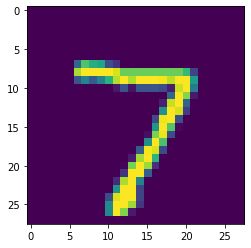

In [16]:
import matplotlib.pyplot as plt

plt.imshow(test_images[0].reshape(28, 28))

In [17]:
predictions[0]

7